### Aplicación kmeans

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Cargar el archivo CSV subido
df = pd.read_csv("data/housing.csv")

# Solo quedate con longitud, latitud y precio 
df = df[['median_house_value', 'latitude', 'longitude']]


### Crae al pipeline y haz fit 
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=4))
])

pipeline.fit(df)


Pipeline(steps=[('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=4))])

pipeline.named_steps['kmeans'].labels_


In [41]:
# Obten los clusters
df['cluster'] = pipeline.predict(df)

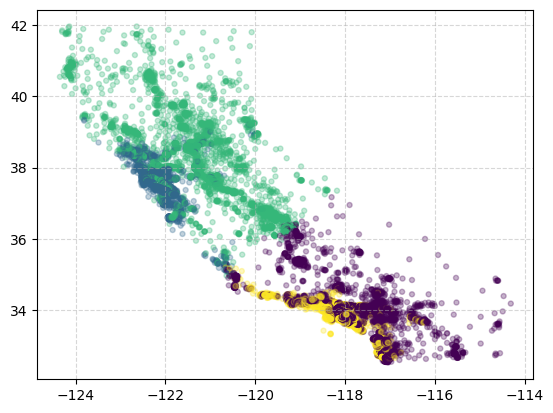

In [42]:
# Graficar
plt.scatter(df['longitude'], df['latitude'], c=df['cluster'], cmap='viridis', alpha=0.3, s=13)
plt.grid(alpha=0.5, ls='--')

### ¿Cuantos clusters escoger?

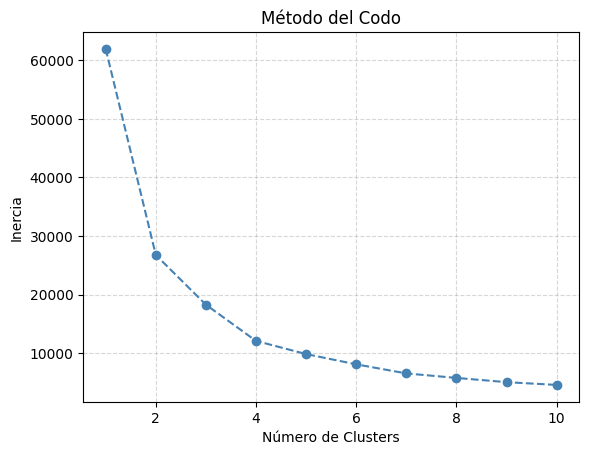

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Datos: ya filtrados en df
X = df[['median_house_value', 'latitude', 'longitude']]


# Guarda la varianza del cluster o "inertia"
inertias = []

# ¿Cuantos clusters probar?
K_range = range(1, 11)

for i in K_range:
    pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=i))
    ])
    pipeline.fit(X)
    inertias.append(pipeline.named_steps['kmeans'].inertia_)


# Gráfica del codo
plt.plot(K_range, inertias, marker='o', linestyle='--', color='steelblue')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.grid(alpha=0.5, ls='--')